In [2]:
from ucimlrepo import fetch_ucirepo
import numpy as np
  
# fetch dataset 
dry_bean = fetch_ucirepo(id=602) 
  
# X shows the input datas for each of the beans. Whearas Y tells the output, name of the bean
X = dry_bean.data.features 
y = np.array(dry_bean.data.targets ).ravel() #ravel 2 flatten 2 1D

#shows how the data structure looks
print("First 5 rows of features:\n", X[:5])
print("First 5 labels:\n", y[:5])


First 5 rows of features:
     Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0  28395    610.291       208.178117       173.888747     1.197191   
1  28734    638.018       200.524796       182.734419     1.097356   
2  29380    624.110       212.826130       175.931143     1.209713   
3  30008    645.884       210.557999       182.516516     1.153638   
4  30140    620.134       201.847882       190.279279     1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     0.913358  

In [3]:
# pre-processing of the data for later machine learning
from sklearn.preprocessing import LabelEncoder

# convert string labels 2 integers
label_encoder = LabelEncoder()
y_int = label_encoder.fit_transform(y)

print("First 5 encoded labels:", y_int[:5])


First 5 encoded labels: [5 5 5 5 5]


In [6]:
from sklearn.model_selection import train_test_split

#splitting data in2 test and train group
X_train, X_test, y_train, y_test = train_test_split(
    X, y_int, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape, "X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape, "y_test shape:", y_test.shape)



X_train shape: (10888, 16) X_test shape: (2723, 16)
y_train shape: (10888,) y_test shape: (2723,)


In [7]:
from sklearn.ensemble import RandomForestClassifier

# initialize random forest
rf = RandomForestClassifier(
    n_estimators=200,  # number of trees
    max_depth=None,
    random_state=42
)

# train the model
rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
# preditc on test set
y_pred = rf.predict(X_test)


In [9]:
#evaluation of model accuracy
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("\nTest set accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



Test set accuracy: 0.9261843554902681

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.91      0.92       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.93      0.94      0.94       317
    DERMASON       0.90      0.92      0.91       671
       HOROZ       0.97      0.96      0.97       408
       SEKER       0.96      0.94      0.95       413
        SIRA       0.88      0.88      0.88       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [10]:
# convert predicted integers back 2 og bean names
predicted_beans = label_encoder.inverse_transform(y_pred)

print("\nFirst 10 predicted beans:")
for i in range(10):
    print(f"Predicted bean: {predicted_beans[i]}")



First 10 predicted beans:
Predicted bean: SEKER
Predicted bean: BARBUNYA
Predicted bean: SEKER
Predicted bean: SEKER
Predicted bean: DERMASON
Predicted bean: SEKER
Predicted bean: CALI
Predicted bean: SEKER
Predicted bean: BOMBAY
Predicted bean: DERMASON


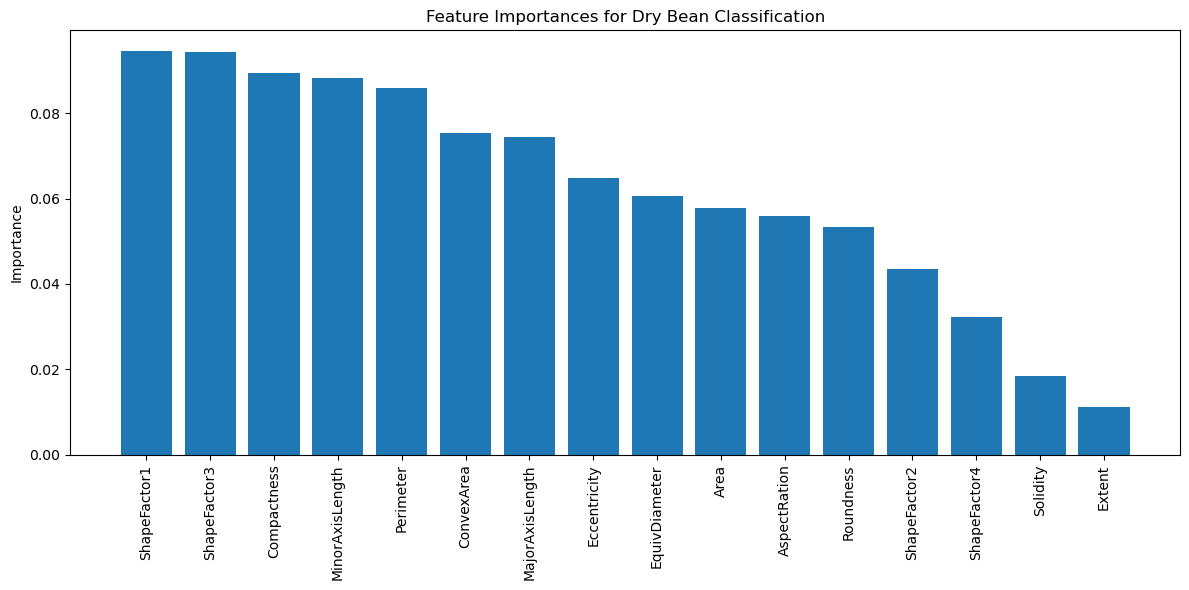

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# get feature importances from the trained forest
importances = rf.feature_importances_
feature_names = [
    'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 
    'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter',
    'Extent', 'Solidity', 'Roundness', 'Compactness', 
    'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4'
]

# sort by imptance
indices = np.argsort(importances)[::-1]  # descending order

plt.figure(figsize=(12,6))
plt.title("Feature Importances for Dry Bean Classification")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

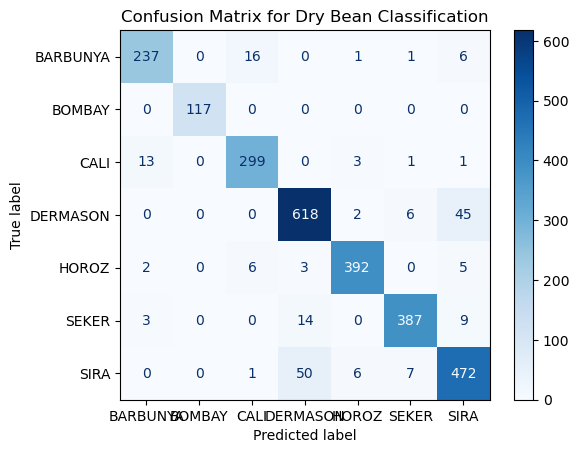

In [25]:
#confusion matrix -> which are being misclassified
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
plt.figure(figsize=(10,8))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for Dry Bean Classification")
plt.show()
